1. 패키지 import

In [ ]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

*  API: Azure > Face 

In [ ]:
subscription_key = '6dc4f4face7f4cd19f890a2cb064b1c5'
face_api_url = 'https://labuser41face.cognitiveservices.azure.com/face/v1.0/detect'

#Class, library, Package 대문자 관례
#지역변수, 파라메타 소문자로 관례
#addr, msg 줄임말은 배제
#두 단어가 합쳐지면 두 번째 단어는 대문자 
#상수는 전체가 대문자   -- const MAX_USER=100

image_url = 'https://post-phinf.pstatic.net/MjAxODAzMTZfMjM0/MDAxNTIxMTg0NDQ1NjEy.Lw140C4MFbI7c6XFusnaXb933SREXA-y28pQ21kychcg.GNwYRrGzf354ALVsTTlV7HawjItIN-PYtZpmw17yuZ8g.JPEG/01.jpg?type=w1200'

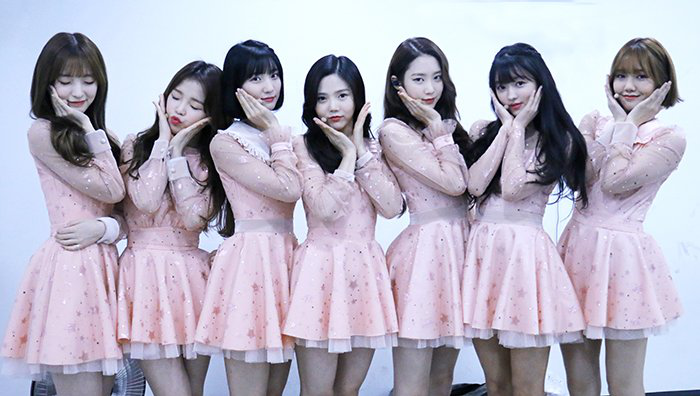

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

In [ ]:
params = {
    'returnFaceId': 'false',     # 얼굴마다 부여된 ID
    'returnFaceLandmarks': 'false',   # 얼굴의 랜드마크 (약 25가지)
    'returnFaceAttributes': 'Smile'  # 얼굴 특징 (미소, 머리포즈 등..)
}

<참고>

https://learn.microsoft.com/ko-kr/azure/cognitive-services/computer-vision/concept-face-detection

In [ ]:
data = {'url': image_url}

In [ ]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 85, 'left': 312, 'width': 44, 'height': 44},
  'faceAttributes': {'smile': 0.025}},
 {'faceRectangle': {'top': 89, 'left': 157, 'width': 44, 'height': 44},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 65, 'left': 245, 'width': 44, 'height': 44},
  'faceAttributes': {'smile': 0.775}},
 {'faceRectangle': {'top': 73, 'left': 491, 'width': 43, 'height': 43},
  'faceAttributes': {'smile': 0.061}},
 {'faceRectangle': {'top': 70, 'left': 56, 'width': 43, 'height': 43},
  'faceAttributes': {'smile': 0.75}},
 {'faceRectangle': {'top': 64, 'left': 610, 'width': 42, 'height': 42},
  'faceAttributes': {'smile': 0.998}},
 {'faceRectangle': {'top': 68, 'left': 408, 'width': 41, 'height': 41},
  'faceAttributes': {'smile': 0.593}}]

In [ ]:
draw = ImageDraw.Draw(image)

In [ ]:
# 사각형 그리기 
def DrawBox(faces):

  for face in faces:
    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']


    draw.rectangle(((left,top),(left+width,top+height)),outline='red')
    
    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']
    draw.text((left,top),str(smile),fill='red')


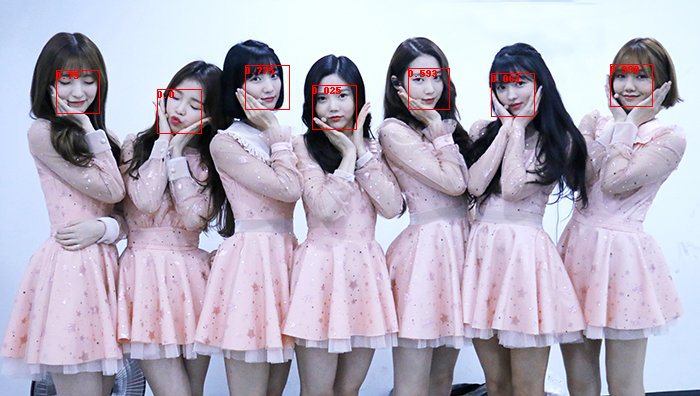

In [ ]:
DrawBox(faces)
image